# Kryptografia klasyczna (od starożytności do czasów współczesnych)
### Literatura:
1. Księga szyfrów, Simon Singh, Świat książki, 2001
2. Łamacze kodów, David Kahn, WNT, 2004

## Szyfry Cezara
--------------
Szyfr Cezara oczywiście nie zawdzięcza swego istnienia Juliuszowi Cezarowi. Został przezeń jedynie wspomniany w pamiętnikach JC o wojnach galijskich. Prawdopodobnie była to dobrze znana metoda w tym czasie.

### Szyfr monoalfabetyczny: 
_danemu symbolowi alfabetu jawnego odpowiada dokładnie jeden i ten sam symbol alfabetu tajnego._

In [31]:
# Alfabet jawny i szyfrowy 
alphabets = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

alphabet_size = 26

plaintext = "Zorro fly zealotry zipper"

ciphertext = ""

key = 15 #przesunięcie permutacji czyli klucz szyfrowania 

print("Tekst jawny: ", plaintext)

for text in plaintext.lower().split():
    for char in text:
        ciphertext = ciphertext + alphabets[(alphabets.index(char) + key) % alphabet_size] 
print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

decodedtext = ""
for text in ciphertext:
    for char in text:
        decodedtext = decodedtext + alphabets[(alphabets.index(char)- key) % alphabet_size]
print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  odggduanotpadignoxeetg (spacje usunięte)
Odszyfrowana wiadomość:  zorroflyzealotryzipper (spacje usunięte)


## Kryptoanaliza szyfrów monoalfabetycznych

Współcześnie kryptoanaliza szyfru Cezara jest trywialna. Można po prostu sprawdzić wszystkie 26 możliwych przesunięć. 

Szyfry monoalfabetyczne nie są także odporne na __kryptoanalizę statystyczną__. Znając rozkład częstości liter w tekstach napisanych w danym języku możemy odgadnąć przesunięcie obserwując minima i maxima w histogramach. 

W zasadzie kluczową sprawą w obu przypadkach jest znajomość języka, a w gruncie rzeczy alfabetu.

Poniżej przykład kryptoanalizy języka tekstowego. 

In [34]:
import nltk
nltk.download('words')
from nltk.corpus import words


unique = []
frequency = []
psi = []
key = 0
value = 0.0
exit = True

ciphertext = "odggd uan".lower()

alphabets = "abcdefghijklmnopqrstuvwxyz"

english_frequency_prob = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 
                          0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 
                          0.030, 0.010, 0.015, 0.005, 0.020, 0.002]



for char in ciphertext: #lista liter w szyfrogramie
    if (char not in unique) and (char.isalpha()):
        unique.append(char)
        
only_alphabets = [char for char in ciphertext if char.isalpha()]  #tylko litery

for unique_char in unique: #częstość liter w tekście 
     frequency.append(ciphertext.count(unique_char) / (float)(len(only_alphabets)))

for i in range(0,26): #oblicz dopasowanie
    for unique_char in unique:
         value = value + frequency[unique.index(unique_char)] * english_frequency_prob[alphabets.index(unique_char) - i]
    psi.append(value)  
    value = 0.0
    
sorted_psi = psi[:] # sortuj dopasowanie
sorted_psi.sort(reverse=True)

decoded_string = ""
for i in range(0, 26):
    key = psi.index(sorted_psi[i])
    decoded_string = ""
    for char in ciphertext:
        if (char != ' '):
            decoded_string = decoded_string + alphabets[alphabets.index(char) - key]
        else:
            decoded_string = decoded_string + " "
            
    print("Próba klucza: ", key, " ....", decoded_string)
    
    for word in decoded_string.split():
        if word not in words.words(): #czy szyfrowanie ma sens
            exit = False
        else:
            exit = True
    if exit:
        break
        
print("\n", "Decoded string: ", decoded_string)

[nltk_data] Downloading package words to /home/topa/nltk_data...
[nltk_data]   Package words is already up-to-date!
Próba klucza:  25  .... pehhe vbo
Próba klucza:  2  .... mbeeb syl
Próba klucza:  13  .... bqttq hna
Próba klucza:  6  .... ixaax ouh
Próba klucza:  6  .... ixaax ouh
Próba klucza:  10  .... etwwt kqd
Próba klucza:  12  .... cruur iob
Próba klucza:  21  .... tilli zfs
Próba klucza:  0  .... odggd uan
Próba klucza:  15  .... zorro fly

 Decoded string:  zorro fly


# Problem
1. Narysuj rozkład częstości występowania liter w języku angielskim (kod rysowania histogramu poniżej)

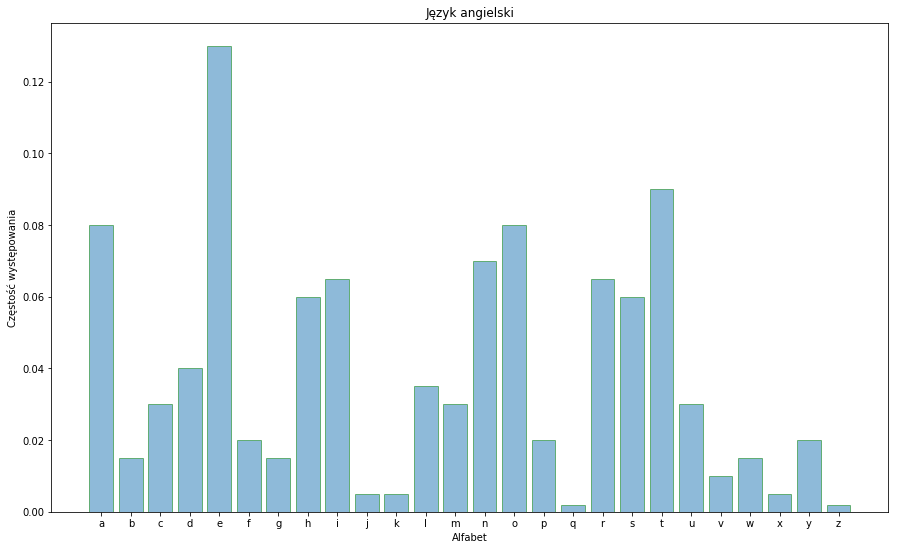

In [28]:
from matplotlib import pyplot as plt
import numpy as np

letters =   ['a',  'b',    'c',   'd',  'e',   'f',   'g',   'h',   'i',   'j',   'k',   'l',    'm',  'n',   'o',   'p',    'q',  'r',   's',   't',   'u',   'v',   'w',   'x',    'y',   'z']
frequency = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 0.030, 0.010, 0.015, 0.005, 0.020, 0.002]
labels = np.arange(len(letters))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Język angielski");
plt.ylabel('Częstość występowania')
plt.show()

2. Dokonaj analizy częstości występowania liter w tekście jawnym i szyfrogramie (szyfr Cezara z dowolnym kluczem) dla tekstu w poniższym fragmencie kodu. Wyświetl wyniki podobnie jak powyżej.  

In [7]:
import numpy as np
from matplotlib import pyplot as plt

plaintext = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"

Alphabet = [
    'a','b','c','d','e','f','g','h','i','j','k','l','m',
    'n','o','p','q','r','s','t','u','v','w','x','y','z'
]

# policz częstość i wyświetl rozkłady 

## Podsumowanie 
Główną słabością szyfrów monoalfabetycznych jest stałość przekształcenia, dzięki czemu możliwe jest łatwe zaobserwowanie regularności.

Rozwiązaniem może być zmiana alfabetów w trakcie szyfrowania. Dla uproszczenia wystarczy zmieniać jedynie porządek liter. 

# Problem
1. Napisać program, który zmienia alfabet szyfrowania po każdej literze.
_Co będzie potrzebne oprócz tekst jawnego?_


In [35]:
plaintext = "THEYTHEMTHE"
#text = "OWUPSIGREPSPLB"
alphabets = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".upper()
key = "LION"
do = "encryption"

index = 0
encoded = []
for symbol in plaintext:
    num = alphabets.find(symbol.upper()) #pozycja litery tekstu w alfabecie
    #print(symbol, ": ", alphabets.find(symbol.upper()))
    if num != -1:
        #print(key[index], ": ", alphabets.find(key[index]))
        if do == 'encryption':
            num += alphabets.find(key[index]) #pozycja litery klucza w alfabecie
        elif do == 'decryption':
            num -= alphabets.find(key[index])
        #print(num)    
        num %= len(alphabets)
        #print(num, ": ", alphabets[num])
        encoded.append(alphabets[num])
        index += 1
        if index == len(key):
            index = 0
    else:
        encoded.append(symbol)

print( ''.join(encoded))

EPSLEPSZEPS


### Zastanów się:
1. Sprawdź jak wygląda histogram szyfrogrami. 
2. Zastanów się jakie znaczenia ma długość klucza dla bezpieczeństwa szyfrowania.
3. Czy powtarzanie klucza można wykorzystać dla potrzeb kryptoanalizy? 
4. Jaki klucz gwarantowałby bezpieczeństwo?
5. Jaki rozkład częstości symboli szyfrogramu nie ujawni żadnych przydatnych danych kryptoanalitykowi? 

### Szyfr polialfabetyczny 
_Szyfr używający wielu alfabetów szyfrowych. W trakcie szyfrowania te same litery w tekście jawnym_

### Szyfr doskonały (według Clouda Shannona):
1. Jakie warunki musi spełniać szyfr-nie-do-złamania? 

## Zadanie (dodatkowe, na ocenę)
1. Napisz notebook jupyter, które implementuje klasyczne szyfry mechaniczne: Enigma, szyfr Playfair, szyfr maszyny Lorenza. W sieci można łatwo znaleźć gotowe kody, wiec przy ocenie zwracam uwagę no dokładne omówienie kodu, przejrzystość, komentarze etc. 

*** 
# Szyfrowanie strumieniowe

Szyfrowanie strumieniowe polega na zastępowaniu litery tekstu jawnego przez literę szyfrogrami, znak po znaku, bit/bajt po bitcie/bajcie.
1. Poszukaj informacji o szyfrowaniu Vernama
2. Jak można skonstruować najprostszy algorytm szyfrowania strumieniowego?

## Problem 
1. Napisz prosty program szyfrujący (z kluczem) ciąg znaków z użyciem operatora logicznego. Jaki operator będzie najwygodniejszy? Jak będziesz używał klucza? 


In [9]:
# napisz program 

### Zastanów się: 
1. Poszukaj informacji o szyfrach binarnie addytywnych 
2. Jakie znaczenie ma klucz w szyfrach tego typu?
3. Co się dzieje gdy klucz jest ,,nielosowy''? 
4. W jaki sposób wygenerować strumień pseudolosowy zależny od klucza?
5. Czy szyfr strumieniowy jak powyżej jest bezpieczny? Czy może być stosowany w praktyce? Jakie widzisz problemy z jego użytkowaniem?

## Jak sprawdzić losowość ciągu? 
Przykładowy test monobit

In [27]:
import numpy
import math
from scipy import special as spc

def monobit(bin_data: str):
    """
    Note that this description is taken from the NIST documentation [1]
    [1] http://csrc.nist.gov/publications/nistpubs/800-22-rev1a/SP800-22rev1a.pdf
  
    The focus of this test is the proportion of zeros and ones for the entire sequence. The purpose of this test is
    to determine whether the number of ones and zeros in a sequence are approximately the same as would be expected
    for a truly random sequence. This test assesses the closeness of the fraction of ones to 1/2, that is the number
    of ones and zeros ina  sequence should be about the same. All subsequent tests depend on this test.
  
    :param bin_data: a binary string
    :return: the p-value from the test
    """
    count = 0
    # If the char is 0 minus 1, else add 1
    for char in bin_data:
        if char == '0':
            count -= 1
        else:
            count += 1
    # Calculate the p value
    sobs = count / math.sqrt(len(bin_data))
    p_val = spc.erfc(math.fabs(sobs) / math.sqrt(2))
    return p_val


#Generowanie n-bitowego ciągu 
n=3
#arr = numpy.random.randint(2, size=(n,))
bitString = []
for i in range(0, 1024):
    x = str(numpy.random.randint(0, 2))
    bitString.append(x)
arr = ''.join(bitString)
print(arr)
print(monobit(arr))

1111010010111111111010001011000100101001000001101000000001000101110100100111010000000110010100110100001000111111100110100100110110001111000100101111111011101001101011001110010011001110101000010101100110000110010111000010001101110111000011100110001001011001001000001011011111001001010100101001001101010110011111001100001001101111100010000110101111101100100100010111011000110101111011110111110011101100111101001111101000000101001011110111111000110001000010001110100011110111101000001000111111000111001011111100101111000001110101000010100110001011111110010100111110110101100010001110100011000110010000101001110101001011011101110000110100111001010110111011011100110011111011010000111111011111110100100011000100000110111111101110011100111000110100011010101000111001101010000011011100111011100111111101000010111100011001000010111111000000101010100000011101110010111100000110001100100010001100001101010110000100011001011011101010000000000010100111011001101100001001001101100110010010010101111011101011101011

## Zadanie (dodatkowe)
Testy losowości NIST https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final
1. Zaimplementuj wybrany test losowości w postaci jupyter notebooka

# Szyfr strumieniowy RC4


In [10]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# author: @manojpandey

# Python 3 implementation for RC4 algorithm
# Brief: https://en.wikipedia.org/wiki/RC4

# Will use codecs, as 'str' object in Python 3 doesn't have any attribute 'decode'
import codecs

MOD = 256


def KSA(key):
    ''' Key Scheduling Algorithm (from wikipedia):
        for i from 0 to 255
            S[i] := i
        endfor
        j := 0
        for i from 0 to 255
            j := (j + S[i] + key[i mod keylength]) mod 256
            swap values of S[i] and S[j]
        endfor
    '''
    key_length = len(key)
    # create the array "S"
    S = list(range(MOD))  # [0,1,2, ... , 255]
    j = 0
    for i in range(MOD):
        j = (j + S[i] + key[i % key_length]) % MOD
        S[i], S[j] = S[j], S[i]  # swap values
    return S


def PRGA(S):
    ''' Psudo Random Generation Algorithm (from wikipedia):
        i := 0
        j := 0
        while GeneratingOutput:
            i := (i + 1) mod 256
            j := (j + S[i]) mod 256
            swap values of S[i] and S[j]
            K := S[(S[i] + S[j]) mod 256]
            output K
        endwhile
    '''
    i = 0
    j = 0
    while True:
        i = (i + 1) % MOD
        j = (j + S[i]) % MOD

        S[i], S[j] = S[j], S[i]  # swap values
        K = S[(S[i] + S[j]) % MOD]
        yield K


def get_keystream(key):
    ''' Takes the encryption key to get the keystream using PRGA
        return object is a generator
    '''
    S = KSA(key)
    return PRGA(S)


def encrypt_logic(key, text, kstr):
    ''' :key -> encryption key used for encrypting, as hex string
        :text -> array of unicode values/ byte string to encrpyt/decrypt
    '''
    # For plaintext key, use this
    key = [ord(c) for c in key]
    # If key is in hex:
    # key = codecs.decode(key, 'hex_codec')
    # key = [c for c in key]
    keystream = get_keystream(key)
    res = []
    for c in text:
        ks = next(keystream)
        kstr.append(ks)
        val = ("%02X" % (c ^ ks))  # XOR and taking hex
        res.append(val)
    return ''.join(res)


def encrypt(key, plaintext):
    ''' :key -> encryption key used for encrypting, as hex string
        :plaintext -> plaintext string to encrpyt
    '''
    kstream =[]
    plaintext = [ord(c) for c in plaintext]
    text = encrypt_logic(key, plaintext,kstream)
    print("Wygenerowany strumień klucza :", kstream)
    return text


def decrypt(key, ciphertext):
    ''' :key -> encryption key used for encrypting, as hex string
        :ciphertext -> hex encoded ciphered text using RC4
    '''
    kstream =[]
    ciphertext = codecs.decode(ciphertext, 'hex_codec')
    res = encrypt_logic(key, ciphertext,kstream)
    return codecs.decode(res, 'hex_codec').decode('utf-8')


def main():

    key = 'not-so-random-key'  # plaintext
    plaintext = 'Good work! Your implementation is correct'  # plaintext
    # encrypt the plaintext, using key and RC4 algorithm
    ciphertext = encrypt(key, plaintext)
    print('plaintext:', plaintext)
    print('ciphertext:', ciphertext)
    # ..
    # Let's check the implementation
    # ..
    ciphertext = '2D7FEE79FFCE80B7DDB7BDA5A7F878CE298615'\
        '476F86F3B890FD4746BE2D8F741395F884B4A35CE979'
    # change ciphertext to string again
    decrypted = decrypt(key, ciphertext)
    print('decrypted:', decrypted)

    if plaintext == decrypted:
        print('\nCongrats ! You made it.')
    else:
        print('Shit! You pooped your pants ! .-.')

    # until next time folks !


def test():

    # Test case 1
    # key = '4B6579' # 'Key' in hex
    # key = 'Key'
    # plaintext = 'Plaintext'
    # ciphertext = 'BBF316E8D940AF0AD3'
    assert(encrypt('Key', 'Plaintext')) == 'BBF316E8D940AF0AD3'
    assert(decrypt('Key', 'BBF316E8D940AF0AD3')) == 'Plaintext'

    # Test case 2
    # key = 'Wiki' # '57696b69'in hex
    # plaintext = 'pedia'
    # ciphertext should be 1021BF0420
    assert(encrypt('Wiki', 'pedia')) == '1021BF0420'
    assert(decrypt('Wiki', '1021BF0420')) == 'pedia'

    # Test case 3
    # key = 'Secret' # '536563726574' in hex
    # plaintext = 'Attack at dawn'
    # ciphertext should be 45A01F645FC35B383552544B9BF5
    assert(encrypt('Secret',
                   'Attack at dawn')) == '45A01F645FC35B383552544B9BF5'
    assert(decrypt('Secret',
                   '45A01F645FC35B383552544B9BF5')) == 'Attack at dawn'

if __name__ == '__main__':
    main()

Wygenerowany strumień klucza : [106, 16, 129, 29, 223, 185, 239, 197, 182, 150, 157, 252, 200, 141, 10, 238, 64, 235, 101, 43, 10, 235, 150, 214, 228, 156, 51, 47, 209, 67, 175, 29, 96, 181, 155, 235, 198, 209, 57, 138, 13]
plaintext: Good work! Your implementation is correct
ciphertext: 2D7FEE79FFCE80B7DDB7BDA5A7F878CE298615476F86F3B890FD4746BE2D8F741395F884B4A35CE979
decrypted: Good work! Your implementation is correct

Congrats ! You made it.
